## Importing libraries

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import healpy as hp #for 3d rotation

# custom
sns.set_context("poster")
sns.set_palette('Set1')
import scatter_plot_matrix as spm 
#see https://marcioodwyer.wordpress.com/2019/01/03/my-python-class-to-plot-correlated-variables/

# for 3d scatter
import plotly.plotly as py
import plotly.graph_objs as go



%matplotlib inline

## Functions to generate data and plot projections

### drawing data 

In [60]:
def draw_data(n):
    """Simulate measuring the oscillator"""
    #time sampling
    t0 = np.random.uniform(0,10, n) 
    # position of oscilattor
    x0 = np.cos(t0)
    # noise
    sigma = .1
    x0 += np.random.normal(scale=sigma, size=len(x0))
    y0 = np.random.normal(scale=sigma, size=len(x0))
    z0 = np.random.normal(scale=sigma, size=len(x0))

    X0 = np.vstack((x0,y0,z0))
    # randomly rotate "camera"
    X = rotate_vector(X0)
    # returns original and rotated
    return X0, X

### 3d functions 

In [131]:
def rotate_vector(vec):
    """Function to simulate data from random 
    camera angle to observe oscillator"""
    a, b, c = np.random.uniform(-np.pi,np.pi,3)
    rotmat = hp.rotator.get_rotation_matrix((a,b,c))[0]
    return hp.rotator.rotateVector(rotmat, vec)

def scatter_3d(X):
    """ Makes 3d scatter plot of the oscillator
    measurements"""
    fig = plt.figure(figsize=(17,17))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[0], X[1], X[2], s=10, c='k')
    
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    lim=1.5
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_zlim(-lim,lim)

    plt.show()
    return

def scatter_3d_plotly(X):
    """ Makes interactive 3d scatter plot of the oscillator
    measurements with plotly"""
    x, y, z = np.copy(X)
    lim= 1.5
    trace1 = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=2,
            color='black',
            line=dict(
                color='white',
                width=0.2
            ),
            opacity=0.6
        )
    )

    data = [trace1]
    layout = go.Layout(
                        margin=dict(
                            l=0,
                            r=0,
                            b=0,
                            t=0
                        ),
                        scene = dict(
                        xaxis=dict(
                        range=[-lim,lim],
                        ),
                        yaxis=dict(
                        range=[-lim,lim],
                        ),
                        zaxis=dict(
                        range=[-lim,lim],
                        ),
                        aspectratio=dict(
                        x=1, y=1, z=1),)   
                    )
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig, filename='3d-scatter')

### 2d functions 

In [60]:
def scatter_2d_proj(X):
    """Make side-by-side plots of each plane projection."""
    fig, axes = plt.subplots(1,3,figsize=(14,4))
    axes[0].scatter(X[0], X[1], color='k', s=5)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[1].scatter(X[0], X[2], color='k', s=5)
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('z')
    axes[2].scatter(X[1], X[2], color='k', s=5)
    axes[2].set_xlabel('y')
    axes[2].set_ylabel('z')
    for ax in axes:
        lim = 1.5
        ax.set_xlim(-lim,lim)
        ax.set_ylim(-lim,lim) 
    plt.subplots_adjust(wspace=.45)
    plt.show()
    return
    

### stats functions

In [69]:
def stat_matrices(X, label = 'X'):
    # to visualize corr and cov matrices
    fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12,4))
    #correlation matrix
    labels = ['x','y','z']
    sns.heatmap(np.corrcoef(X), xticklabels=labels, yticklabels=labels, 
                vmax=1, vmin=-1, annot=True,
               annot_kws = dict(fontsize=20), ax=ax1)
    ax1.set_title('Correlation matrix: {}'.format(label))


    #covariance matrix
    Cx = np.dot(X,X.T)/(n-1)
    #correlation matrix
    sns.heatmap(Cx, xticklabels=labels, yticklabels=labels, 
                annot=True,
               annot_kws = dict(fontsize=20), ax = ax2)
    ax2.set_title('Covariance matrix: {}'.format(label))
    fig.subplots_adjust(wspace=0.3)
    return fig, [ax1,ax2]

## Simulating and visualizing data

In [52]:
n = 300 #measurements
X0, X = draw_data(n) #original and rotated data
print("Data matrix has dimensions",X.shape)

Data matrix has dimensions (3, 300)


### Dynamics angle

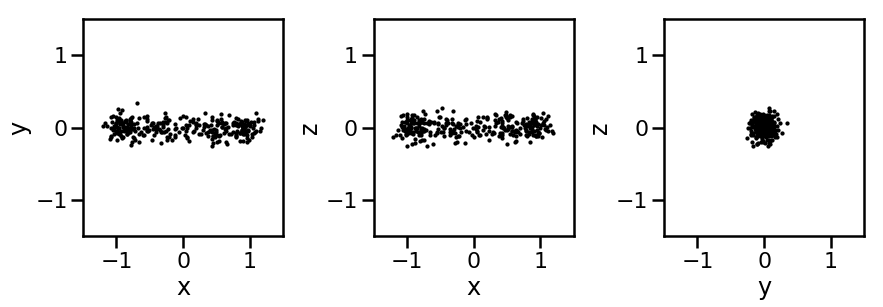

In [57]:
scatter_2d_proj(X0)

In [132]:
scatter_3d_plotly(X0)

### Rotated angle

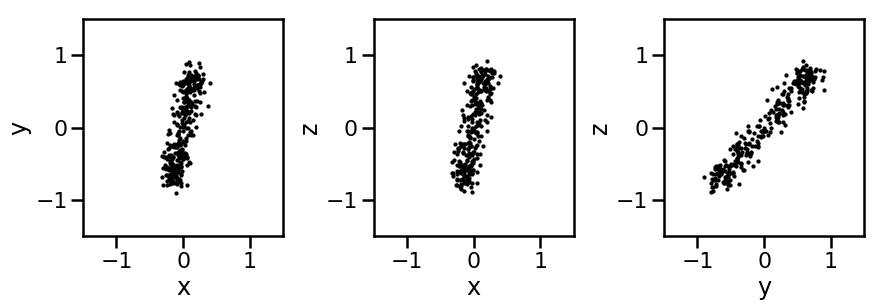

In [58]:
scatter_2d_proj(X)

In [59]:
scatter_3d_plotly(X)

## Covariance and Correlations

### Original Data 

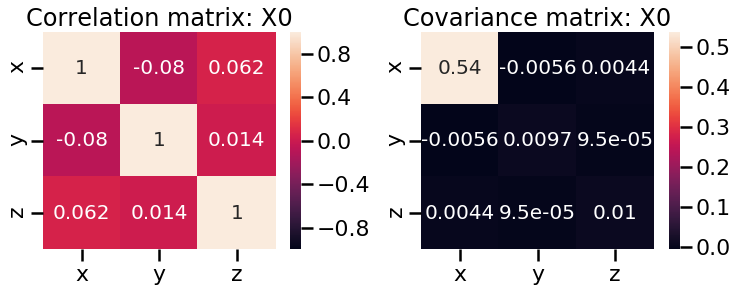

In [73]:
fig, axes = stat_matrices(X0, 'X0')

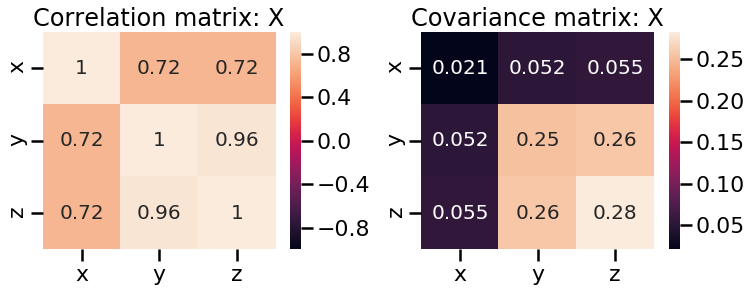

In [70]:
fig, axes = stat_matrices(X, 'X')

## Applying PCA

In [88]:
# using pca from sklearn
pca = PCA(len(X))
X_pca = pca.fit_transform(X.T).T;

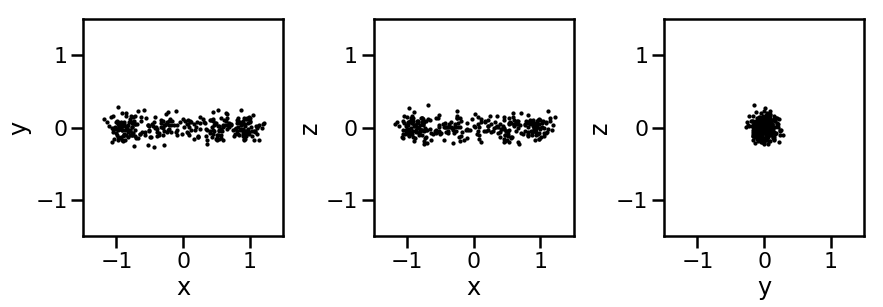

In [89]:
scatter_2d_proj(X_pca)

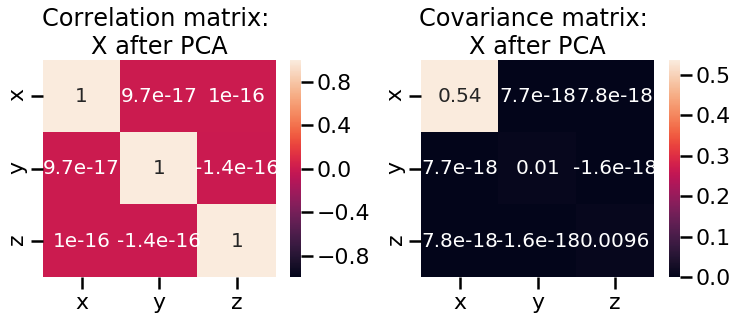

In [125]:
fig, axes = stat_matrices(X_pca, '\nX after PCA')

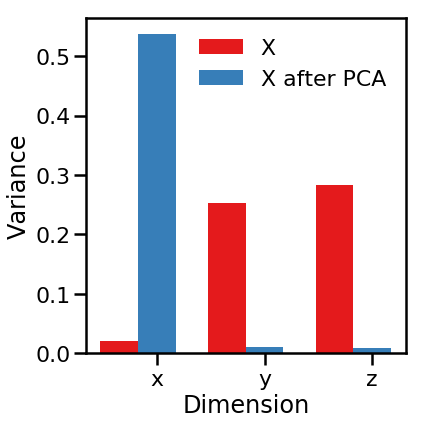

In [124]:
# data to plot
var_X = np.diag(np.cov(X))
var_X_pca = pca.explained_variance_
 
# create plot
fig, ax = plt.subplots(figsize=(6,6))
index = np.arange(len(var_X))
bar_width = 0.35
rects1 = plt.bar(index, var_X, bar_width,
                 label='X')
 
rects2 = plt.bar(index + bar_width, var_X_pca, bar_width,
                 label='X after PCA')
 
plt.xlabel('Dimension')
plt.ylabel('Variance')
plt.xticks(index + bar_width, ('x', 'y', 'z'))
plt.legend(frameon=False)
 
plt.tight_layout()
plt.show()